# Week 01
---

## **Implementing Linear Regression from Scratch**

In [36]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# Generating data for linear regression
x = 2 * np.random.rand(100, 1)                      
y = 4 + 3 * x + np.random.randn(100, 1) * 1.5

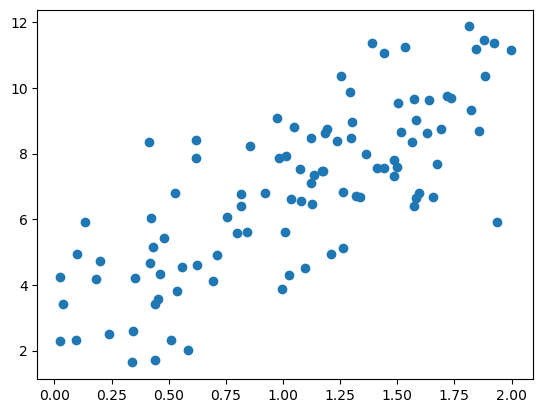

In [38]:
plt.scatter (x, y)

In [39]:
# Defining initial slope and intercept
w = 1
b = 0

In [40]:
# No of training examples
m = len (x)

In [41]:
def cost_function (x, y, w, b):
    sq_err = 0
    for i in range (m):
        sq_err += ((w*x[i] + b) - y[i])**2
    return 1/(2*m) * (sq_err)

In [42]:
print (cost_function (x, y, w, b))

[19.21582715]


### Trying different values of slope manually to get an intution

In [43]:
# WHEN w = 0.5
w = 0.5
print (cost_function (x, y, w, b))

[22.83083467]


In [44]:
# WHEN w = 0
w = 0
print (cost_function (x, y, w, b))

[26.79458922]


In [45]:
# WHEN w = -0.5
w = -0.5
print (cost_function (x, y, w, b))

[31.10709079]


In [46]:
# WHEN w = -1.0
w = -1
print (cost_function (x, y, w, b))

[35.76833938]


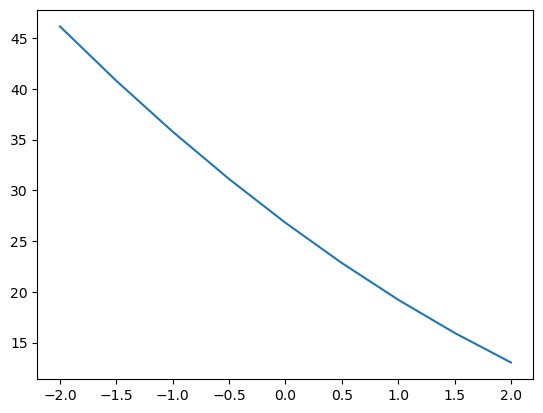

In [47]:
# Writing all costs in a list in ascending order
all_w = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
#all_w = [10, 5, 2, 1.5, 1, 0.5, 0, -0.5, -1.0]

costs = []
for w_i in all_w:
    costs.append(cost_function(x, y, w_i, b))
plt.plot (all_w, costs)

### Implementing Gradient Descent

In [48]:
# Gradient Descent Function
def gradient_descent(X, y, w, b, learning_rate, num_iterations):
    m = len(y)  # Number of training examples
    cost_history = np.zeros(num_iterations)  # Track cost over iterations
    
    for i in range(num_iterations):
        predictions = X * w + b  # Predictions
        errors = predictions - y  # Prediction errors
        
        # Gradient calculation
        dw = (1 / m) * np.sum(errors * X)  # Partial derivative w.r.t. w
        db = (1 / m) * np.sum(errors)  # Partial derivative w.r.t. b
        
        # Update parameters
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # Record the cost for visualization
        cost_history[i] = cost_function(X, y, w, b)
    
    return w, b, cost_history

In [49]:
# Setting up learning rate and iterations
learning_rate = 0.1
num_iterations = 50

In [50]:
w_final, b_final, cost_history = gradient_descent(x, y, w, b, learning_rate, num_iterations)

print("Final weight (w) found by gradient descent:", w_final)
print("Final intercept (b) found by gradient descent:", b_final)

Final weight (w) found by gradient descent: 3.4134056854827577
Final intercept (b) found by gradient descent: 3.3120495441070443


C:\Users\fayez\AppData\Local\Temp\ipykernel_6812\1713581495.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost_history[i] = cost_function(X, y, w, b)


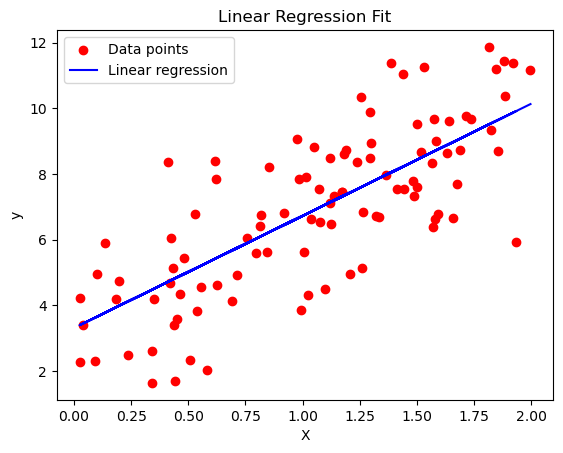

In [51]:
# Plot the Regression Line
plt.scatter(x, y, color='red', marker='o', label='Data points')
plt.plot(x, x * w_final + b_final, color='blue', label='Linear regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression Fit')
plt.show()

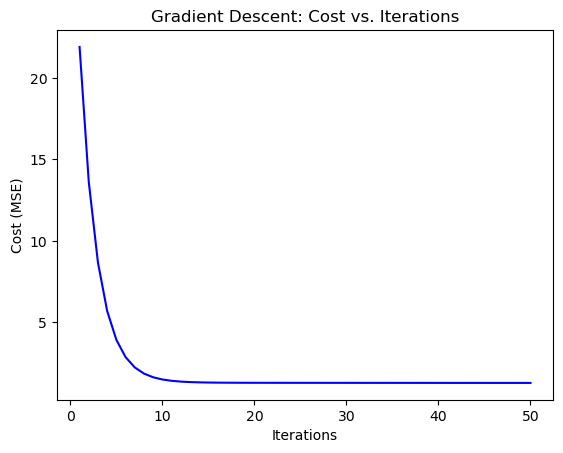

In [52]:
# Checking the slope of costs against iterations
plt.plot(range(1, num_iterations + 1), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Gradient Descent: Cost vs. Iterations')
plt.show()